In [334]:
import matplotlib.pyplot as plt
import random
import numpy as np
import scipy.stats as sts
from scipy.integrate import quad

In [335]:
n=100
teta=6 #некоторое значение параметра 
x=sts.pareto(b=teta).rvs(100)
beta=0.95

In [336]:
# b) Доверительный интервал для медианы

In [337]:
t=n/np.sum(np.log(x))+1 # омп
a=2**(1/(t-1))*(1-1.97*np.log(2)/(np.sqrt(n)*(t-1)))
b=2**(1/(t-1))*(1+1.97*np.log(2)/(np.sqrt(n)*(t-1)))
print('Доверительный интервал для медианы(', round(a,3), ',', round(b, 3), ')')
x_med=(np.sort(x)[49] + np.sort(x)[48])/2
print("x_med", round(x_med,3))

Доверительный интервал для медианы( 1.118 , 1.181 )
x_med 1.136


In [338]:
#quantile(x, (1+beta)/2)=1.97  для beta=0.95
#quantile(x, (1+beta)/2)=-1.97 

In [339]:
#c) Байесовский доверительный интервал 

In [340]:
p=np.product(x)

In [341]:
def f(x,n,p):
    return np.exp(1-x)*(x-1)**n / (p**x)

def integral_1(p, c=None, v=0.025):
    integral=0
    low=1
    hight=10e2
    step=10e-4
    mas_index=np.arange(low, hight, step)
    
    if c is not None:
        for i in range(len(mas_index)-1):
                    st=step*0.5*(f(mas_index[i],n,p)+f(mas_index[i+1], n, p))*c
                    integral+=st
                    if integral>=v:
                        return mas_index[i]
    else:
        for i in range(len(mas_index)-1):
                st=step*0.5*(f(mas_index[i], n, p)+f(mas_index[i+1], n, p)) 
                integral+=st
        return integral

In [342]:
integ=integral_1(p)
c=1/integ
a_b=integral_1(p,c,0.025)
b_b=integral_1(p,c,0.975)
print('Байесовский доверительный интервал (', np.round(a_b,4), ',', np.round(b_b,4), ')')
print('teta', teta)

<ipython-input-341-ea9162003037>:2: RuntimeWarning: overflow encountered in double_scalars
  return np.exp(1-x)*(x-1)**n / (p**x)


Байесовский доверительный интервал ( 4.893 , 6.756 )
teta 6


In [343]:
#d) Асимпотический доверительный интервал для  параметра teta

In [344]:
a1=t-1.96*(t-1)/(n**0.5)
b1=t+1.96*(t-1)/(n**0.5)
print('Асимпотический доверительный интервал для параметра  teta: (', round(a1,2), ',', round(b1, 2), ')')
print('teta', round(teta,3))

Асимпотический доверительный интервал для параметра  teta: ( 4.99 , 6.94 )
teta 6


In [345]:
# e) Вootstrap

In [346]:
#непараметрический 

In [347]:
s_delta=[]
for i in range(1000):
    bootstrap=np.random.choice(x, n) 
    delta=n/np.sum(np.log(bootstrap))+1
    s_delta.append(delta-t)
a3=t-np.sort(np.array(s_delta))[24]
b3=t-np.sort(np.array(s_delta))[974]
print('Bootstrap доверительный интервал (', round(b3,3), ', ', round(a3, 3), ')')
print('teta', teta)

Bootstrap доверительный интервал ( 4.757 ,  6.854 )
teta 6


In [348]:
#параметрический

In [349]:
delta_p=[]
N=10000
for i in range(N):
    bootstrap=sts.pareto(b = teta).rvs(100)
    delta=n/np.sum(np.log(bootstrap))+1-t
    delta_p.append(delta)
k1=int((1-beta)/2 * N)
k2=int((1+beta)/2 * N)
a_par=t+np.sort(np.array(delta_p))[k1]
b_par=t+np.sort(np.array(delta_p))[k2]
print('параметрический bootstrap доверительный интервал (', round(a_par,3), ', ', round(b_par, 3), ')') 
print('teta', teta)

параметрический bootstrap доверительный интервал ( 5.979 ,  8.414 )
teta 6


In [350]:
# g) Сравнение интервалов

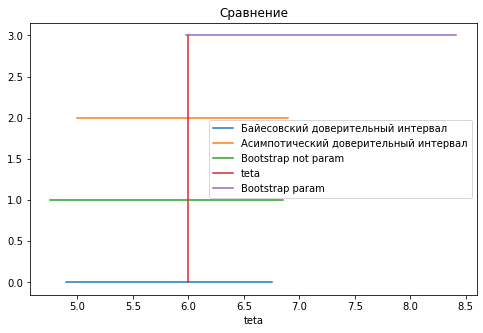

In [351]:
fig, ax = plt.subplots(figsize=(8,5))
#ax.plot([a, b], [2, 2], label = 'Доверительный интервал для медианы')
ax.plot([a_b,b_b], [0, 0], label = 'Байесовский доверительный интервал ')
ax.plot([round(a1,1),round(b1,1)], [2, 2], label = 'Асимпотический доверительный интервал')
ax.plot([b3,a3], [1, 1], label = 'Вootstrap not param')
ax.plot([teta, teta], [0,3], label = 'teta')
ax.plot([a_par,b_par], [3,3], label = 'Вootstrap param')
ax.set_title('Сравнение')    
ax.set_xlabel('teta')
ax.legend();


In [352]:
a_b=b_b-a_b
print("l_Байесовский доверительный интервал", a_b.round(3))
a_p=b1-a1
print("l_Асимпотический доверительный интервал", a_p.round(3))
a_m=a3-b3
print("l_Вootstrap not param", a_m.round(3))
a_t=b_par-a_par
print("l_Вootstrap not param", a_t.round(3))
a=[a_b,a_p,a_m,a_t]
t=(min(a))

for i in range(0,4):
    if (a[i]==t):
        if i==0:
            print("l_min Байесовский доверительный интервал",t.round(3))
        if i==1:
            print("l_min Асимпотический доверительный интервал",t.round(3))
        if i==2:
            print("l_min Вootstrap not param ",t.round(3))
        if i==3:
            print("l_min Вootstrap not param",t.round(3))

l_Байесовский доверительный интервал 1.863
l_Асимпотический доверительный интервал 1.947
l_Вootstrap not param 2.096
l_Вootstrap not param 2.435
l_min Байесовский доверительный интервал 1.863
